In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [6]:
df.columns=['RD_spend','Administration','Marketing_spend','State','Profit']
df.head()

,RD_spend,Administration,Marketing_spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


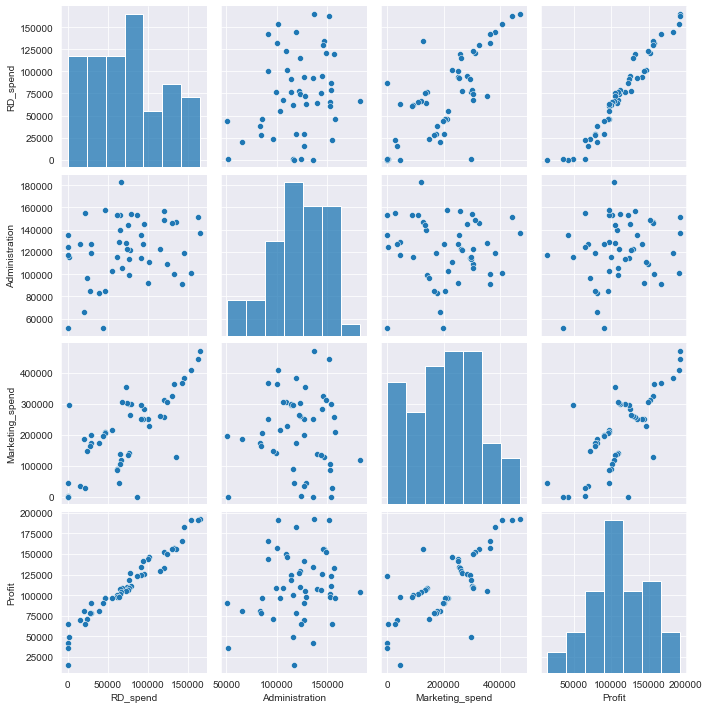

In [7]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [8]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~Marketing_spend+Administration+RD_spend',df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        20:16:11   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Marketing_spend     0.0272      0.016      1.655      0.105      -0.006       0.060
Administration     -0.0268      0.051     -0.526      0.602      -0.130       0.076
RD_spend            0.8057      0.045     17.846      0.000       0.715       0.897
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
model.params

Intercept          50122.192990
Marketing_spend        0.027228
Administration        -0.026816
RD_spend               0.805715
dtype: float64

In [10]:
print(model.tvalues, '\n', model.pvalues)

Intercept           7.626218
Marketing_spend     1.655077
Administration     -0.525507
RD_spend           17.846374
dtype: float64 
 Intercept          1.057379e-09
Marketing_spend    1.047168e-01
Administration     6.017551e-01
RD_spend           2.634968e-22
dtype: float64


In [11]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [12]:
ml_v=smf.ols('Profit~Marketing_spend',df).fit()  
#t and p-Values
print(ml_v.tvalues,'\n', ml_v.pvalues)  

Intercept          7.808356
Marketing_spend    7.802657
dtype: float64 
 Intercept          4.294735e-10
Marketing_spend    4.381073e-10
dtype: float64


In [13]:
ml_v=smf.ols('Profit~Administration',df).fit()  
#t and p-Values
print(ml_v.tvalues,'\n', ml_v.pvalues) 

Intercept         3.040044
Administration    1.419493
dtype: float64 
 Intercept         0.003824
Administration    0.162217
dtype: float64


In [14]:
ml_v=smf.ols('Profit~RD_spend',df).fit()  
#t and p-Values
print(ml_v.tvalues,'\n', ml_v.pvalues) 

Intercept    19.320288
RD_spend     29.151139
dtype: float64 
 Intercept    2.782697e-24
RD_spend     3.500322e-32
dtype: float64


In [15]:
rsq_Marketing_spend = smf.ols('Marketing_spend~Administration+RD_spend',df).fit().rsquared 
rsq_Marketing_spend

0.5702202685282503

In [16]:
vif_Marketing_spend = 1/(1-rsq_Marketing_spend)
vif_Marketing_spend

2.3267732905308773

In [17]:
rsq_Administration = smf.ols('Administration~RD_spend+Marketing_spend',df).fit().rsquared 
rsq_Administration

0.14900208239517532

In [18]:
vif_Administration = 1/(1-rsq_Administration)
vif_Administration

1.1750910070550453

In [19]:
rsq_RD_spend = smf.ols('RD_spend~Marketing_spend+Administration',df).fit().rsquared 
rsq_RD_spend

0.5949618224573936

In [20]:
vif_RD_spend = 1/(1-rsq_RD_spend)
vif_RD_spend

2.4689030699947017

In [21]:
d1 = {'Variables':['RD_spend','Marketing_spend','Administration'],'VIF':[vif_RD_spend,vif_Marketing_spend,vif_Administration]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RD_spend,2.468903
1,Marketing_spend,2.326773
2,Administration,1.175091


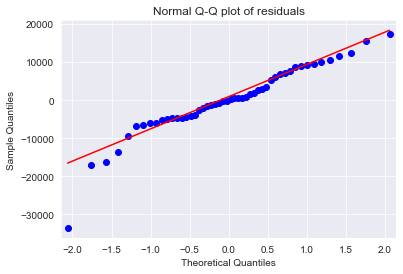

In [22]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [23]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [24]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

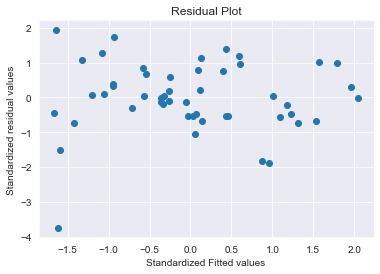

In [25]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

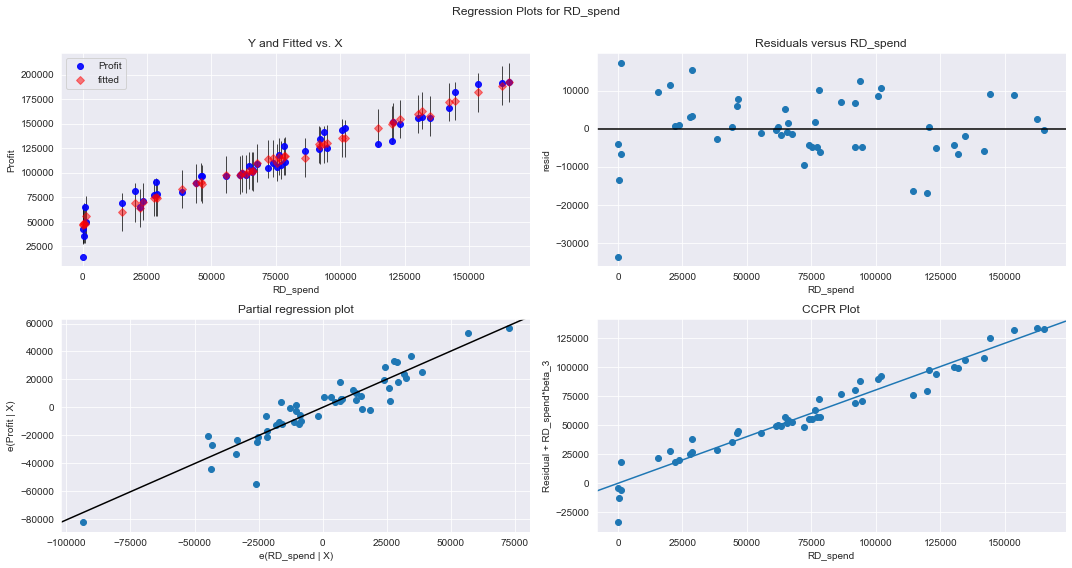

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RD_spend", fig=fig)
plt.show()

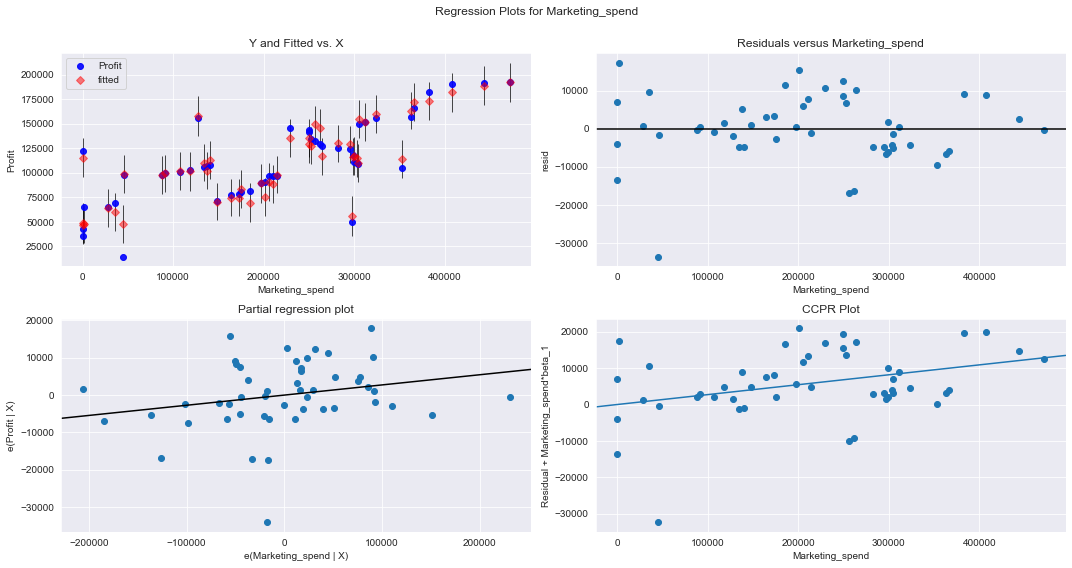

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_spend", fig=fig)
plt.show()

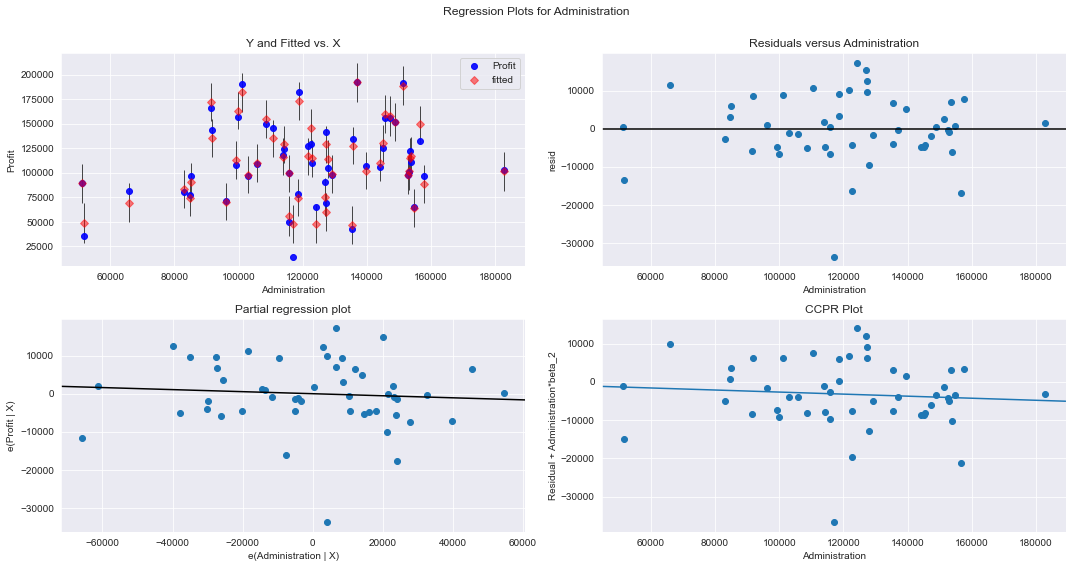

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

In [29]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

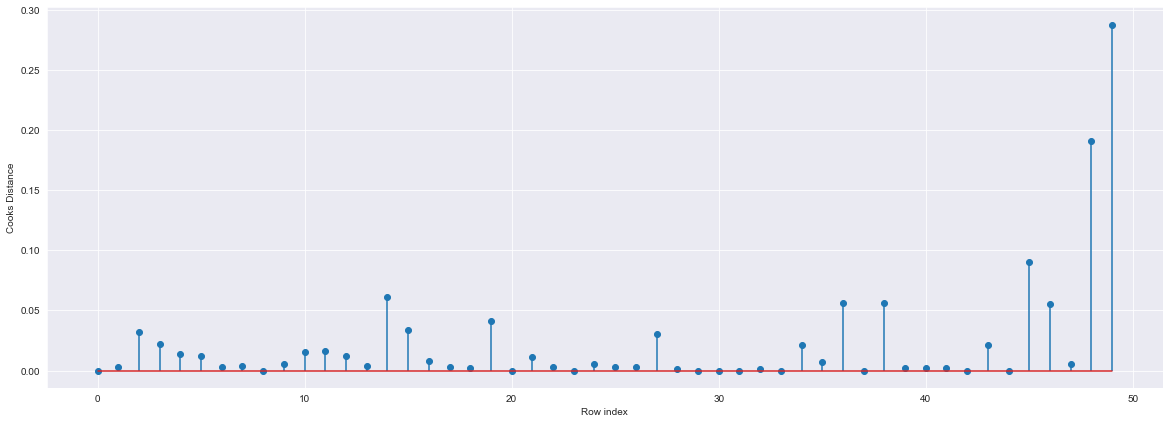

In [30]:
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [31]:
(np.argmax(c),np.max(c))

(49, 0.28808229275432673)

Since the value is <1 , we can stop the diagnostic process and finalize the model

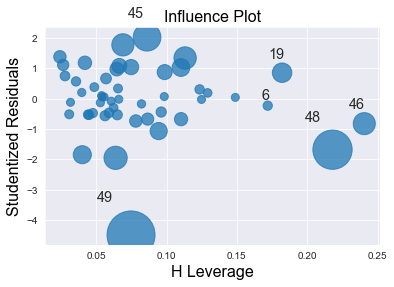

In [32]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [33]:
k =df.shape[1]
k

5

In [34]:
n =df.shape[0]
n

50

In [35]:
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.36

In [36]:
final_ml_V= smf.ols('Profit~Marketing_spend+Administration+RD_spend',data = df).fit()

In [37]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.9507459940683246, 1058.7714985998055)

In [38]:
#New data for prediction
new_data=pd.DataFrame({'Marketing_spend':43200,"Administration":232005,"RD_spend":114050},index=[1])

In [39]:
final_ml_V.predict(new_data)

1    136968.808085
dtype: float64

In [40]:
final_ml_V.predict(df.iloc[0:5,])

0    192521.252890
1    189156.768232
2    182147.279096
3    173696.700026
4    172139.514183
dtype: float64

In [41]:
pred_y = final_ml_V.predict(df)
pred_y

0     192521.252890
1     189156.768232
2     182147.279096
3     173696.700026
4     172139.514183
5     163580.780571
6     158114.096669
7     160021.363048
8     151741.699699
9     154884.684110
10    135509.016367
11    135573.712961
12    129138.054182
13    127487.991663
14    149548.646335
15    146235.159985
16    116915.405401
17    130192.447208
18    129014.226806
19    115635.216367
20    116639.669231
21    117319.451640
22    114706.981717
23    109996.615221
24    113362.966113
25    102237.725065
26    110600.575350
27    114408.071457
28    101660.026005
29    101794.983452
30     99452.372936
31     97687.856276
32     99001.328985
33     97915.007805
34     89039.273741
35     90511.599568
36     75286.174585
37     89619.537708
38     69697.430648
39     83729.011977
40     74815.953991
41     74802.556239
42     70620.411821
43     60167.039963
44     64611.354916
45     47650.649687
46     56166.206853
47     46490.588983
48     49171.388158
49     48215.134111
